# Ultimate guide to AdaBoost,random forest and XGBoost
This notebook will outline the general benefits of treebased ensemble algorithms,describe the concept of bagging and boosting, and explain the contrast the ensemble algorithms AdaBoost,random forest and XGBoost.
## Tree Based ensemble Algorithms
*Ensemble algoritms and particularly those that utilize decision trees as weak learners have multiple advantages compared to other algorithms*

1. Their algorithms are easy to understand and visualize: describing and sketching a decision tree is arguably easier than describing support vector machine 
2. They are `non-parametric` and don't assume or require the data to follow a particular distribution: this will safe your time transforming data to be normally distributed
3. They can handle `mixed data types`: categorical variable do not necessarily have to be one hot encoded
4. `Multi-collinearity` of feature does not affect the accuracy and prediction performance of the model:feature do not need to be removed or otherwise engineered to decrease the correlations and interactions between them
5. They are `robust against overfitting` because they use many weak learners that underfit (high bias ) and combine those prediction into a stronger learner, they reduce the overfitting  (variance) of the model.
6. They are relatively `robust against outlier and noise` : in general, they will handle noisy data (feature with no effect on the overall performance )  
7. Input do `not need to be scaled:` processsing and transforming the feature with MinMaxScaler or StandardScaler are not neccessary
8. They are `computationaly relatively inexpensive`: compared to algorithms such as Support Vector Machine or neural networks they are faster
9. They usually performs `much better than their weak learners:` decision trees will be less accurate due to their high varience/ overfitting

# Boosting 
The concept of boosting and bagging are central to understand these tree-based ensemble models. `Boosting`describe the combination of many weak learner into one very accurate prediction algorithm. A weak learner into a one very accurate prediction algorithm. A week learner  refer to a learning algorithm that only predict slightly better than randomly. When looking at tree based ensemble algorithm a single decision tree would be the weak learner and the combination of multiple of these would be the result in the AdaBoost algorithm,for example. The boosting appraoch is sequantial algorithm that makes prediction for T round on the entire training sample and iteratively imporve the performance of the boosting algorithm with the information from the prior round prediction accuracy  
# Begging
on the other hand refer to non-sequential learning. For T rounds, a random subset of sample is drawn(with replacement) from the training samples. Each of these draws are independent of the previous round draw but have the same distribution. These randomly selected samples are often used to grow a decision tree (week learner). The most popular class or average prediction value in case of regression problems is then chossen as the final prediction value. The bagging appraoch is also called boostrapping

# AdaBoost(it adapt previos accuracy)
The AdaBoost algorithm is part of the family of boosting algoritm and was first introduced by `Freund & Schapire in 1996`. it is `sequentially growing decision trees` as weak learners and punishing incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistake. The final prediction is the weighted majority vote(or weigthed median in case of regression)

The `Pseudo code` of the AdaBoost algorithm for a classification problem is shown below adapted
*There are certain advantages and disadvantages inherent to the adaBoost algorithm. AdaBoost is relatively robust to overfitting in low noise dataset. AdaBoost has only fe hyperparameters that need to tuned to improve model performance .Moreover this algorithm is easy to understand adn to visulize.However, for noisy data the performance of AdaBoost is debated with some arguing taht it generalize well while other show that noisy data leads to poor performance due to algorithmspending too much time on learning extreme cases and skewning result. Compard to random forest and XGBoost,AdaBoost perform worse when the irrelevant feature are include in the model*

The `relevant hyperparametr` to tune are limited to
1. the maximum depth of the weak learners/decision tree
2. the learning rate and the number of iteration/rounds. 
   The learning rate balance the influence of each decision tree on the overall algorithm, while the macximumm depth ensure that samples are not memorized, but the model will generalize well with new data.

   The above information shows taht AdaBoost is best used in a datasets with low noise, when compuational complexity or timeliness of results is not a main concern and when there are not enough resources for broader hyperparameter tuning due to lack of time and knowledge of the user

   # Random forest 
   The random forests algorithm based on the bagging approach. This algorithm is boostraping the data by randomly choosing subsamples for each iteration of growing trees. Thegrowing happen in parallel which is a key difference between AdaBosst and random forest. Random forest achive a reduction in overfitting by combining many weak learners that underfit because they only utilize a subset of all training samples.Another difference between AdaBoost and reandom forest is taht the latter choose only a random subset of feature to be include in each treee, while the former includeds all feature for all trees

   Random forests is such a popular algorithm because it is highly accurate, relatively robust against noise and noise and outliers, it is fast, can do implicit feature selection and is simple to implement and to understand and visualize . The main advantage of random forest over AdaBoost are thatit is less affected by noise and generalization error reaches a limit with an increasing number of tree being grown (CLT central limit theorem) However a disadvantages of random forest have the more hyperparameter for tuning necessary because of a high number of relevant parameter. Morever, random forest introduce randomness into the training and testing data which is not suitable for all data sets
   The hyperparameter to consider include the 
   1. number of feature
   2. maximum depth of tree 
   3. number of trees
   4. whether the boostrap to sample or not 
   5. the minimum number of sample left in a node before the split
   6. the minimum number of sample left in the final leaf node

*In general too much complexity in the training phase will lead to overfitting. Therefore a lower number of feature should shoukld be choosen(around one third). A large number of trees tends to yield better performance while the maximum depth as well as the minimum number of sample per leaf before spliting should be relatively low *

**This algoritm can handle noise relatively will, but more knowlegde from the user is required**

   # XGBoost
    XGBoost is a relatively new algorithm that was introduced in 2016 and is utilizing the concept of the gradient tree boosting. XGBoost was developed to increase speed adn performance, while introducing regularization parameter to reduce overfitting Gradient boosted trees use regresion trees in sequential learning process as weak learners. These regression tree are similar to decision tres however they use a countinuous score assigned to each leaf which is summed up and provideds the final prediction. For each iteration i which grow a tree score w are calculated which predict a certain outconme y . The learning process aims to minimize the overall score which is composd of the losds function at anrd teh newtre structure of t thsi allows the algoeithm to sequentially grow the trees and learn from prevous iterations. Gradient descent is then used to compute the optimal values for each leaf and the overall score of the tree t . The score is also callde teh impurity of the preditions of a tree

   **Taking the best parts of AdaBoost and random forest and adding additional feature**

* Sequential tree Growing 
* minimize loss function using gradient descnt 
* paralel processing to increase speed
* Regularization parameter

*The main advantage of XGBoost is its lighting speed compared to other algorithms, such as AdaBoost, and its regularization parameter that successfully reduce variance. But even aside from the regulization parameter, this algorithm leverage a learning rate shrinking and the subsample from the feature like random forest, which increase its ability to generalized even further even further However XGBoost is more difficult to understand visulize and tune compared to AdaBoost and random forest. There is multitude of hyperparameter that can be tuned to increse performance *

#### Hyperparameter

1. The learning rate 
2. column subsampling
3. regulization rate were already mention
4. subsample(which is boostraping the training sample)
5. maximum depth of tree
6. minimum weight in the child notes for spliting 
7. number of estimators

all hyperparameter used to decrease the overfitting of the model 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

# load the dataset
diamonds_df = sns.load_dataset('diamonds')

# Split the diamonds dataset

X = diamonds_df.drop('price',axis=1)
y = diamonds_df['price']

# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Train evalute the model 
ada = AdaBoostRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = {'AdaBoost':ada,'Random Forest':rf,'XGBoost':xgb}

for name,models in models.items():
    models.fit(X_train,y_train)
    y_pred = models.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f'{name}-MSE:{mse:.2f}')

AdaBoost-MSE:1583023.45
Random Forest-MSE:292016.21
XGBoost-MSE:288165.44


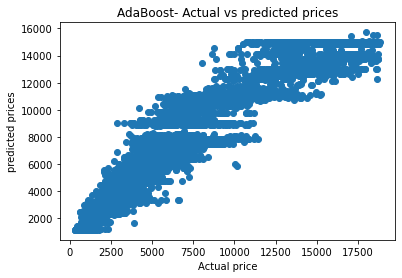

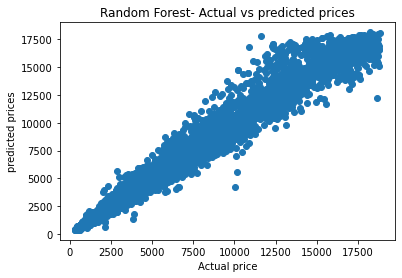

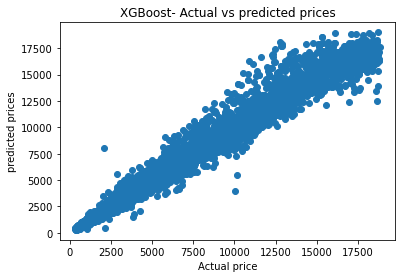

In [10]:
#lets visulize the model 
models = {'AdaBoost':ada,'Random Forest':rf,'XGBoost':xgb}

for name,models in models.items():
    models.fit(X_train,y_train)
    y_pred = models.predict(X_test)
    plt.scatter(y_test,y_pred)
    plt.xlabel('Actual price')
    plt.ylabel('predicted prices')
    plt.title(f'{name}- Actual vs predicted prices')
    plt.show()

In [11]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [12]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [14]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# XGBoost VS. Randomforest
with hyperparameter tuning

**`n_estimator in rf :`** n_estimators: The n_estimators parameter determines how many decision trees will be created in the Random Forest ensemble. In other words, it sets the number of individual trees that will be trained and combined to make predictions.

Higher Values: Increasing the value of n_estimators typically leads to a more robust and accurate Random Forest model, as it benefits from the wisdom of more trees. However, there are diminishing returns, and at some point, adding more trees may not significantly improve performance but will increase computation time.

Lower Values: Using a lower value for n_estimators will result in a simpler model with fewer trees. This may reduce the risk 
of overfitting but could also lead to a less accurate model.

**`max_depth :`**  the max_depth parameter in the Random Forest ensemble algorithm controls the depth of individual decision trees in the forest, affecting the model's complexity and its ability to capture patterns in the data. Properly tuning this parameter is important for achieving a balance between bias and variance in your Random Forest model.

**`min_samples_split`** In the Random Forest ensemble algorithm, the min_samples_split parameter controls the minimum number of samples required to split an internal node during the construction of a decision tree within the Random Forest. It is one of the hyperparameters that you can tune to optimize the performance of your Random Forest model.

**`min_samples_leaf`:** In summary, the min_samples_leaf parameter in the Random Forest ensemble algorithm controls the minimum number of samples required in a leaf node of each decision tree, and it is a crucial hyperparameter for controlling the model's complexity and preventing overfitting.







In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

# load the dataset
diamonds_df = sns.load_dataset('diamonds')

# Split the diamonds dataset

X = diamonds_df.drop('price',axis=1)
y = diamonds_df['price']

# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Train evalute the model 

rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# hyperparameter of these models
rf_params ={
    'n_estimators':[100,300,500],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
    
}
xgb_params = {
    'n_estimators':[100,300,500],
    'max_depth':[3,5,7],
    'learnig_rate':[0.1,0.01,0.001],
    'subsample':[0.6,0.8,1],
    'colsample_bytree':[0.6,0.8,1]
}

# perform grid search to find the best hyperparameter for each model
rf_gs = GridSearchCV(rf,rf_params,scoring='neg_mean_squared_error',cv=5)
rf_gs.fit(X_train,y_train)
rf_best = rf_gs.best_estimator_

xgb_gs = GridSearchCV(xgb,xgb_params,scoring='neg_mean_squared_error',cv=5)
xgb_gs.fit(X_train,y_train)
xgb_best = rf_gs.best_estimator_

# Evaluate the model on the testing set
rf_pred = rf_best.predict(X_test)
rf_mse = np.mean((rf_pred -y_test)**2)
print(f'Random Forest - MSE:{rf_mse:.2f}')

xgb_pred = xgb_best.predict(X_test)
xgb_mse = np.mean((xgb_pred -y_test)**2)
print(f'Xtreem gradient boos - MSE:{xgb_mse:.2f}')